# Cross Flow Fouling Models

Imput the filename:

In [69]:
file = 'MW_NF90.csv'

Required modules:

In [70]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Cross flow models
* Complete pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Internal pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Partial pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Cake formation - returns a list containing predicted times at imputed flux (f)

In [71]:
def complete_pore_blocking( t, k, Jst):
    return (J0 - Jst)*np.exp(-k*t) +Jst
def internal_pore_blocking(t, k):
    A=140
    return J0/(1+(1/2)*k*np.sqrt(A*J0)*t)
def partial_pore_blocking(t, k, Jst):
    return Jst/(1-((J0-Jst)/J0)*np.exp(-Jst*k*t))
def cake_formation(j, k, Jst):
    t = k*(np.log((j/J0)*(J0-Jst)/(j-Jst))-Jst*(1/j-1/J0))/Jst**2
    return t

Opening .csv file as a DataFrame

In [72]:
df = pd.read_csv(file)

* J0 - initial flux
* Jst - initial estimation for the flux at stationary state
* A - membnrane area 

In [73]:
J0 = df.iloc[0]['Flux']
df['Flux'] = df['Flux']/J0
Jst_pr = df.iloc[-1]['Flux']
#A = 0.0140  # membrane area in m2

Parameter determination - fitting the model to the imput data

In [74]:
cpb_popt, cpb_pcov = curve_fit(complete_pore_blocking , df[:]['Time'], df[:]['Flux'],  p0=[0.001, Jst_pr])
print('Complete pore blocking',cpb_popt,cpb_pcov)

ipb_popt, ipb_pcov = curve_fit(internal_pore_blocking , df[:]['Time'], df[:]['Flux'],  p0=[0.01])
print('Internal pore blocking', ipb_popt)

ppb_popt, ppb_pcov = curve_fit(partial_pore_blocking , df[:]['Time'], df[:]['Flux'],  p0=[0.001, Jst_pr])
print('Partial pore blocking', ppb_popt)

cf_popt, cf_pcov = curve_fit(cake_formation , df[:]['Flux'], df[:]['Time'],  p0=[150, Jst_pr*0.1],  maxfev=10000)
print('Cake formation', cf_popt)

Complete pore blocking [ 0.03718189  0.83108615] [[  3.13132168e-05   3.37101921e-05]
 [  3.37101921e-05   5.57522041e-05]]
Internal pore blocking [ 0.00041234]
Partial pore blocking [ 0.03787203  0.8275434 ]
Cake formation [ 167.26862458    0.47688264]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Ploting the results

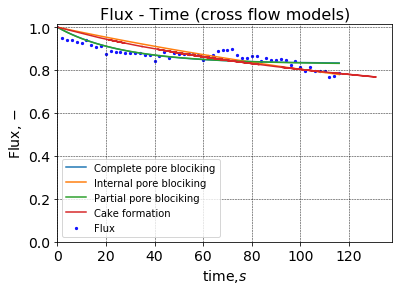

In [75]:
#Ploting the values predicted by the fitted models
plt.plot(df['Time'], complete_pore_blocking(df['Time'],*cpb_popt ), label='Complete pore blociking')
plt.plot(df['Time'], internal_pore_blocking(df['Time'],*ipb_popt ), label='Internal pore blociking')
plt.plot(df['Time'], partial_pore_blocking(df['Time'],*ppb_popt ), label='Partial pore blociking')
plt.plot( cake_formation(df['Flux'],*cf_popt ), df['Flux'],  label='Cake formation')


#Ploting the inital data and plot editing
plt.scatter(df['Time'], df['Flux'], s=5, color='b', alpha=0.9)
plt.title('Flux - Time (cross flow models)', size=16)
plt.xlabel('time,$s$', size=14)
plt.ylabel('Flux, $-$', size=14)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.tick_params(labelsize=14)
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color='.1', zorder=-10)
plt.show()

Saving the data as an Excel spreadsheet

In [76]:
df['complete pore blocking'] = complete_pore_blocking(df['Time'],*cpb_popt )
df['internal_pore_blocking'] = internal_pore_blocking(df['Time'],*ipb_popt )
df['partial_pore_blocking'] = partial_pore_blocking(df['Time'],*ppb_popt )

df['Time, cf'] = cake_formation(df['Flux'],*cf_popt )
df['Flux_cf'] = df['Flux']

writer = pd.ExcelWriter(file + '_fouling_modela_results.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()

df.head()

,Time,Flux,complete pore blocking,internal_pore_blocking,partial_pore_blocking,"Time, cf",Flux_cf
0,0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
1,2,0.951613,0.987895,0.995145,0.987497,17.074132,0.951613
2,4,0.941935,0.976657,0.990337,0.976035,20.917620,0.941935
3,6,0.938710,0.966224,0.985575,0.965509,22.234391,0.938710
4,8,0.929032,0.956539,0.980858,0.955827,26.296382,0.929032
